In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/spam.csv',encoding='latin1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4601,ham,\Hey j! r u feeling any better,hopeSo hunny. i amnow feelin ill & ithink i m...,NaN,NaN
1978,ham,No I'm in the same boat. Still here at my moms...,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
2425,ham,Hey!!! I almost forgot ... Happy B-day babe ! ...,NaN,NaN,NaN
640,ham,Well imma definitely need to restock before th...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

**1**. **DATA** **CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#DROP LAST THREE COLUMNS

df.drop(columns=['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 3'],inplace =True)

In [ ]:
#RENAMING COLUMNS

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

df.sample(5)

,target,text
191,ham,I'm sorry. I've joined the league of people th...
823,spam,25p 4 alfie Moon's Children in need song on ur...
4773,ham,U repeat e instructions again. Wat's e road na...
1961,ham,LOL that would be awesome payback.
620,ham,Dear we got &lt;#&gt; dollars hi hi


In [ ]:
# TARGET HAS ONLY HAM OR SPAM CONVERTED TO 1 OR 0.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#CHECKING FOR MISSING VALUES

df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#CHECKING FOR DUPLICATE VALUES

df.duplicated().sum()

403

In [ ]:
#REMOVING DUPLICATE VALUES

df = df.drop_duplicates(keep = 'first')

df.duplicated().sum()

0

**2. EDA**

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

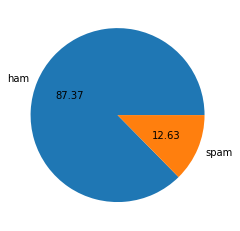

In [ ]:
# RATIO OF HAM AND SPAM

import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#CREATING NEW COLUMNS : NO OF WORDS, NO OF CHARACTERS, NO OF SENTENCES

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#NO OF CHARACTERS

df['num_characters'] = df['text'].apply(len)

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#NO OF WORDS
 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#NO OF SENTENCE

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#DESCRIBING THOSE THREE COLUMNS.

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#DESCRIBING THOSE THREE COLUMNS FOR HAM MESSAGES

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#DESCRIBING THOSE THREE COLUMNS FOR SPAM MESSAGES

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


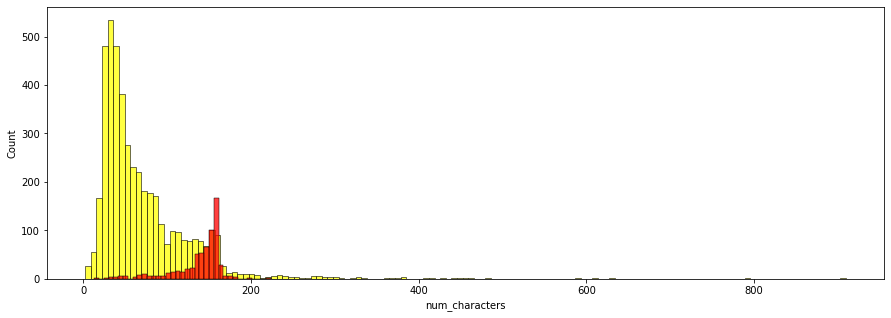

In [ ]:
#PLOTTING ANALYSIS

#1.HISTOGRAM FOR HAM AND SPAMS IN NUM_CHARACTERS

import seaborn as sns

plt.figure(figsize=(15,5))

sns.histplot(df[df['target']==0]['num_characters'], color='yellow')

sns.histplot(df[df['target']==1]['num_characters'], color='red')


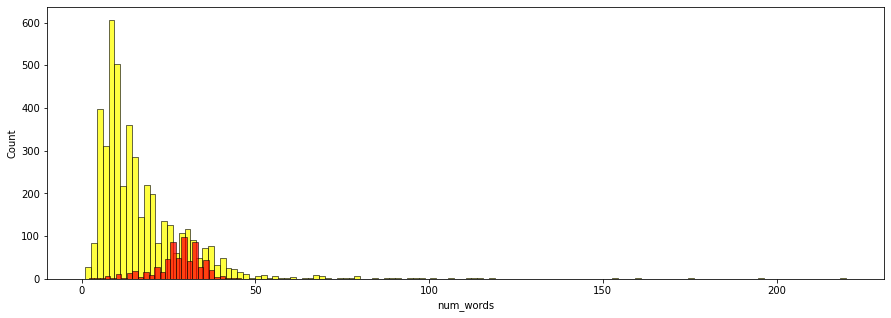

In [ ]:
#PLOTTING ANALYSIS

#1.HISTOGRAM FOR HAM AND SPAMS IN NUM_WORDS

import seaborn as sns

plt.figure(figsize=(15,5))

sns.histplot(df[df['target']==0]['num_words'], color='yellow')

sns.histplot(df[df['target']==1]['num_words'], color='red')


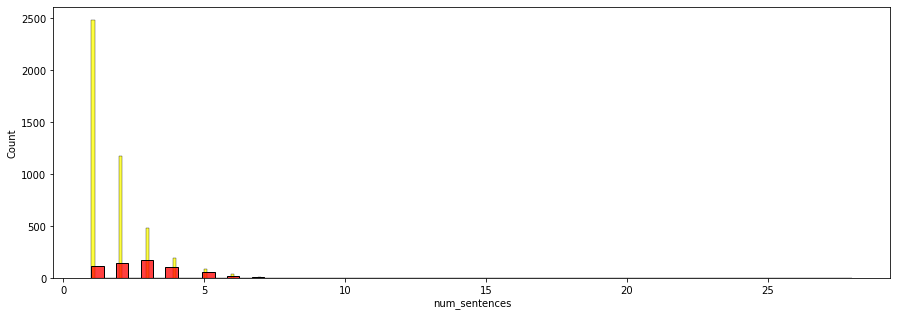

In [ ]:
#PLOTTING ANALYSIS

#1.HISTOGRAM FOR HAM AND SPAMS IN NUM_SENTENCES

import seaborn as sns

plt.figure(figsize=(15,5))

sns.histplot(df[df['target']==0]['num_sentences'], color='yellow')

sns.histplot(df[df['target']==1]['num_sentences'], color='red')


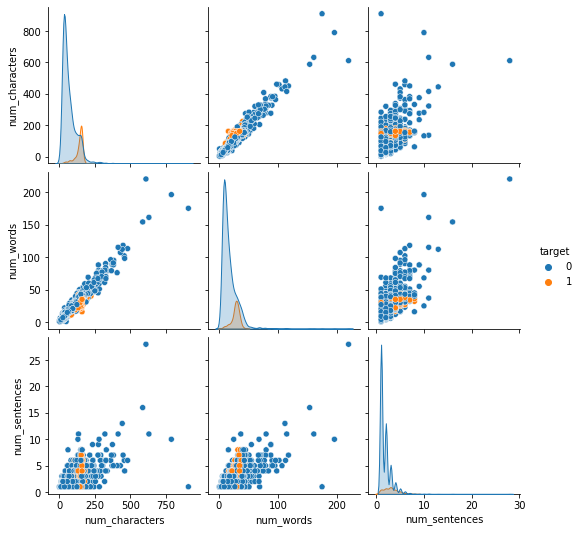

In [ ]:
#RELATION BETWEEN THOSE THREE COLUMNS

sns.pairplot(df, hue='target')

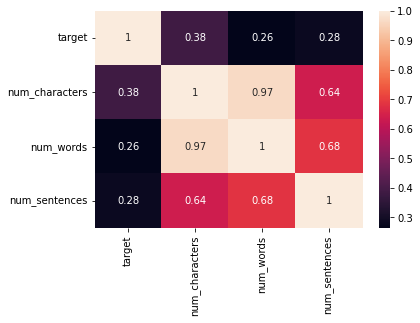

In [ ]:
#HEATMAP OF CORRELATION.

sns.heatmap(df.corr(),annot=True)

**DATA PREPOCESSING.**

In [ ]:
from nltk.corpus import stopwords

import string

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [ ]:
def transform_text(text):

  text = text.lower()  #lower-casing.

  text = nltk.word_tokenize(text) #tokenizing.

  y = []

  for i in text:

    if i.isalnum():    #removing special characters.

      y.append(i)

  text = y[:]

  y.clear()

  for i in text:        #removing stopwords and punctuation.

    if i not in stopwords.words('english') and i not in string.punctuation:

      y.append(i)

  
  text = y[:]

  y.clear()

  for i in text:   #stemming.

    y.append(ps.stem(i))


  return " ".join(y)


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# GENERATING WORD CLOUD.

from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

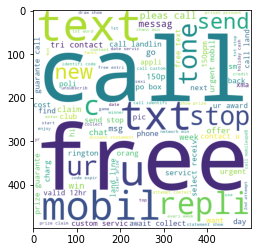

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

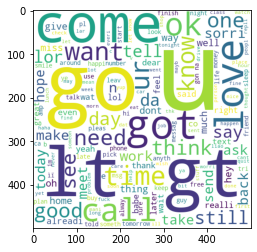

In [ ]:
plt.imshow(ham_wc)

In [ ]:
#FINDING TOP 50 WORDS USED IN SPAM AND HAM.

spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():

  for word in msg.split():

    spam_corpus.append(word)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


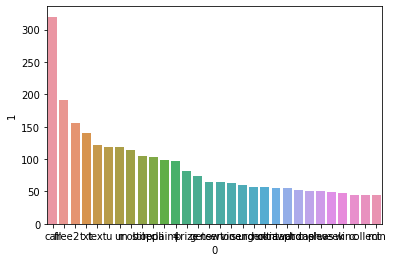

In [ ]:
from collections import Counter

s = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(s[0],s[1])

**4.MODEL BULDING**

In [ ]:
#VECTORIZING THE DATA.

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features = 3000) #model improvement changing the max_features parameter of tfidf.

In [ ]:
# x = cv.fit_transform(df['transformed_text']).toarray()
x = tfidf.fit_transform(df['transformed_text']).toarray()


**Tfidf with MultinomialNaiveBayes**

In [ ]:
x.shape

(5169, 3000)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))